# Statistics Challenge (Optional)

Use the `orders.csv` dataset in the same directory to complete this challenge.

**Background**:

There are exactly 100 sneaker shops on a sneaker retailing website, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

**Questions**:

- What went wrong with this metric and our analysis? 

- Propose some new metrics that better represents the behavior of the stores' customers. Why are these metrics better? You can propose as many new metrics as you wish but quality heavily outweights quantity.

- Find the values of your new metrics.

- Report any other interesting findings.

Show all of your work in this notebook.

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("orders.csv")
df

,order_id,shop_id,user_id,order_value,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [4]:
df.describe()

,order_id,shop_id,user_id,order_value,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


Looking at the original analysis that calculated an AOV of $3145.13, this number comes from the mean order value. This number is so large due to the max order value being 704,000 which pulls the mean higher and skews the data. A better metric would be looking at the median. Take avg number of items bought and multiply by average shoe cost.
cost per shoe finds the person one shoe at large value otherwise it would blend in with many shoes at small value

Find 95 percentile and 5 percentile
Do everything in between for cost per shoe and total items

In [5]:
df["cost_per_shoe"] = df["order_value"] / df["total_items"]
df.describe()

,order_id,shop_id,user_id,order_value,total_items,cost_per_shoe
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720,387.742800
std,1443.520003,29.006118,87.798982,41282.539349,116.32032,2441.963725
min,1.000000,1.000000,607.000000,90.000000,1.00000,90.000000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000,133.000000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000,153.000000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000,169.000000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000,25725.000000


<AxesSubplot:title={'center':'Sodium Content Distrbution'}, ylabel='Frequency'>

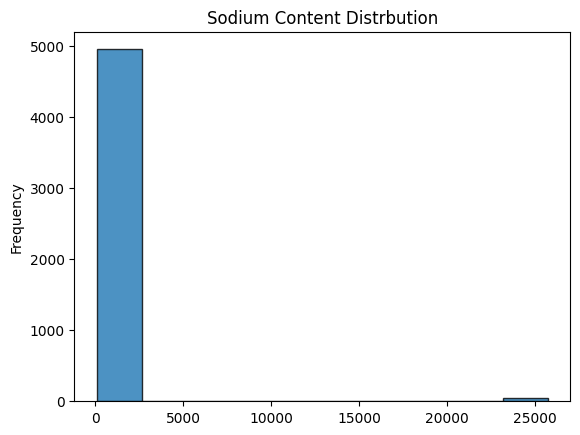

In [6]:
df["cost_per_shoe"].plot.hist(edgecolor='black', alpha=0.8, title="Sodium Content Distrbution")

In [11]:
new = df[df["order_value"] < 700000]

In [12]:
new.describe()

,order_id,shop_id,user_id,order_value,total_items,cost_per_shoe
count,4983.000000,4983.000000,4983.000000,4983.000000,4983.00000,4983.00000
mean,2501.060405,50.106362,849.918322,754.091913,1.99398,387.86474
std,1443.090253,29.051718,86.800308,5314.092293,0.98318,2446.12562
min,1.000000,1.000000,700.000000,90.000000,1.00000,90.00000
25%,1250.500000,24.000000,776.000000,163.000000,1.00000,133.00000
50%,2502.000000,50.000000,850.000000,284.000000,2.00000,153.00000
75%,3750.500000,75.000000,925.000000,390.000000,3.00000,168.00000
max,5000.000000,100.000000,999.000000,154350.000000,8.00000,25725.00000


In [8]:
new2 = new[new["cost_per_shoe"] < 20000]

In [9]:
new2.describe()

,order_id,shop_id,user_id,order_value,total_items,cost_per_shoe
count,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000
mean,2499.551347,49.846465,849.752279,302.580514,1.994734,151.788536
std,1444.069407,29.061131,86.840313,160.804912,0.982821,29.034215
min,1.000000,1.000000,700.000000,90.000000,1.000000,90.000000
25%,1248.000000,24.000000,775.000000,163.000000,1.000000,132.000000
50%,2497.000000,50.000000,850.000000,284.000000,2.000000,153.000000
75%,3751.000000,74.000000,925.000000,387.000000,3.000000,166.000000
max,5000.000000,100.000000,999.000000,1760.000000,8.000000,352.000000


One person bought a shoe that cost 25725. Multiple ppl bought 2000 pairs of shoes that costs 704000 total.
We filtered out the outliers which were people with very high total items as well as a very high cost per shoe.
We use the mean for the average total items as well as the mean for the cost per shoe. We can multiply them together to get the 
average order value which is 302.78. The average cost per shoe is around 151.00 while the average number of items ordered is 2.